In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pip install opencv-python
import cv2
import os
import time


Note: you may need to restart the kernel to use updated packages.


In this day and age, the amount of stored data in the world is ever increasing, while the amount of resources and capacity to make digital storage is limited. With the rise of machine learning and data storage algorithms, there are a number of ways to optimize the data storage so one can represent the data with significantly less bits than the original. For instance are there several lossy compression methods to process images, where the file type JPEG is one of the most popular. A technique used in the storing of a JPEG is to group up similar looking pixels and representing them with the same color. Using this you will never be able to recover the original value of the pixels, but it is often more than not good enough to fool the average human.

In [18]:
#Implementation of the algorithm.
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """
    if seed != 0:
        np.random.seed(seed)
    W = np.random.uniform(0,1,(V.shape[0],d))
    H = np.random.uniform(0,1,(d,V.shape[1]))
    W = np.sqrt(np.mean(V)/d)*W
    H = np.sqrt(np.mean(V)/d)*H
    V_dev = np.zeros(maxiter+1)
    for k in range(maxiter):
        V_dev[k] = np.linalg.norm(V-np.dot(W,H))
        H = H*np.dot(W.T,V)/(np.dot(W.T,np.dot(W,H))+delta) # Dot product is associative
        W = W*np.dot(V,H.T)/(np.dot(W,np.dot(H,H.T))+delta)
    V_dev[-1] = np.linalg.norm(V-np.dot(W,H))
    return W, H, V_dev

In [19]:
A1 = np.identity(2)
A2 = np.array([[1,2],[1,1],[1,2]])
W1, H1, V_dev1 = NMF(A1,2, maxiter=10000)
W2, H2, V_dev2 = NMF(A2,2, maxiter=10000)

#print(W1,H1,np.dot(W1,H1),V_dev1[-1])
#print(W2,H2,np.dot(W2,H2),V_dev2[-1])
print(V_dev1)

[1.29961767e+00 4.50524800e-01 1.57654694e-01 ... 6.77655350e-10
 6.77655277e-10 6.77655555e-10]


In [20]:
A3 = np.array([[2,1,1],[2,1,1],[1,1,2]])
A4 = np.array([[2,1,0],[1,2,3],[0,3,3]])

print(np.linalg.matrix_rank(A3))
print(np.linalg.matrix_rank(A4))

2
3


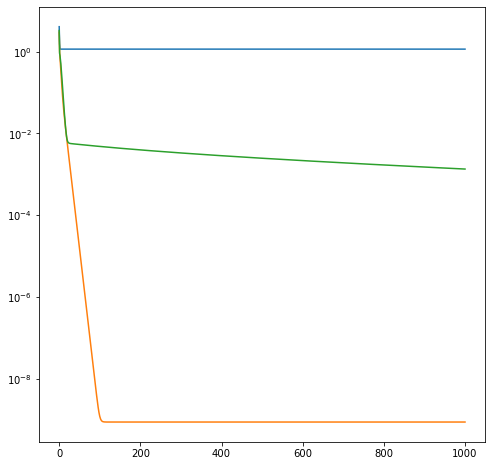

In [21]:
for i in range(1,4):
    W3, H3, V_dev3 = NMF(A3,i)
    plt.semilogy(V_dev3)

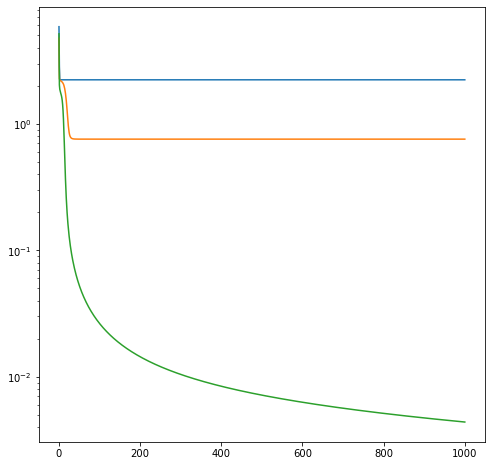

In [22]:
for i in range(1,4):
    W4, H4, V_dev4 = NMF(A4,i)
    plt.semilogy(V_dev4)


In [42]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)


(24, 24, 4, 500)


In [43]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None, title = " "):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    #Setting title for the plot
    st = fig.suptitle(title, fontsize = 'xx-large', color = 'blue')
    st.set_y(1)
    fig.subplots_adjust(top=1)
    # Tight layout so images will appear closer together
    plt.tight_layout()


    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams


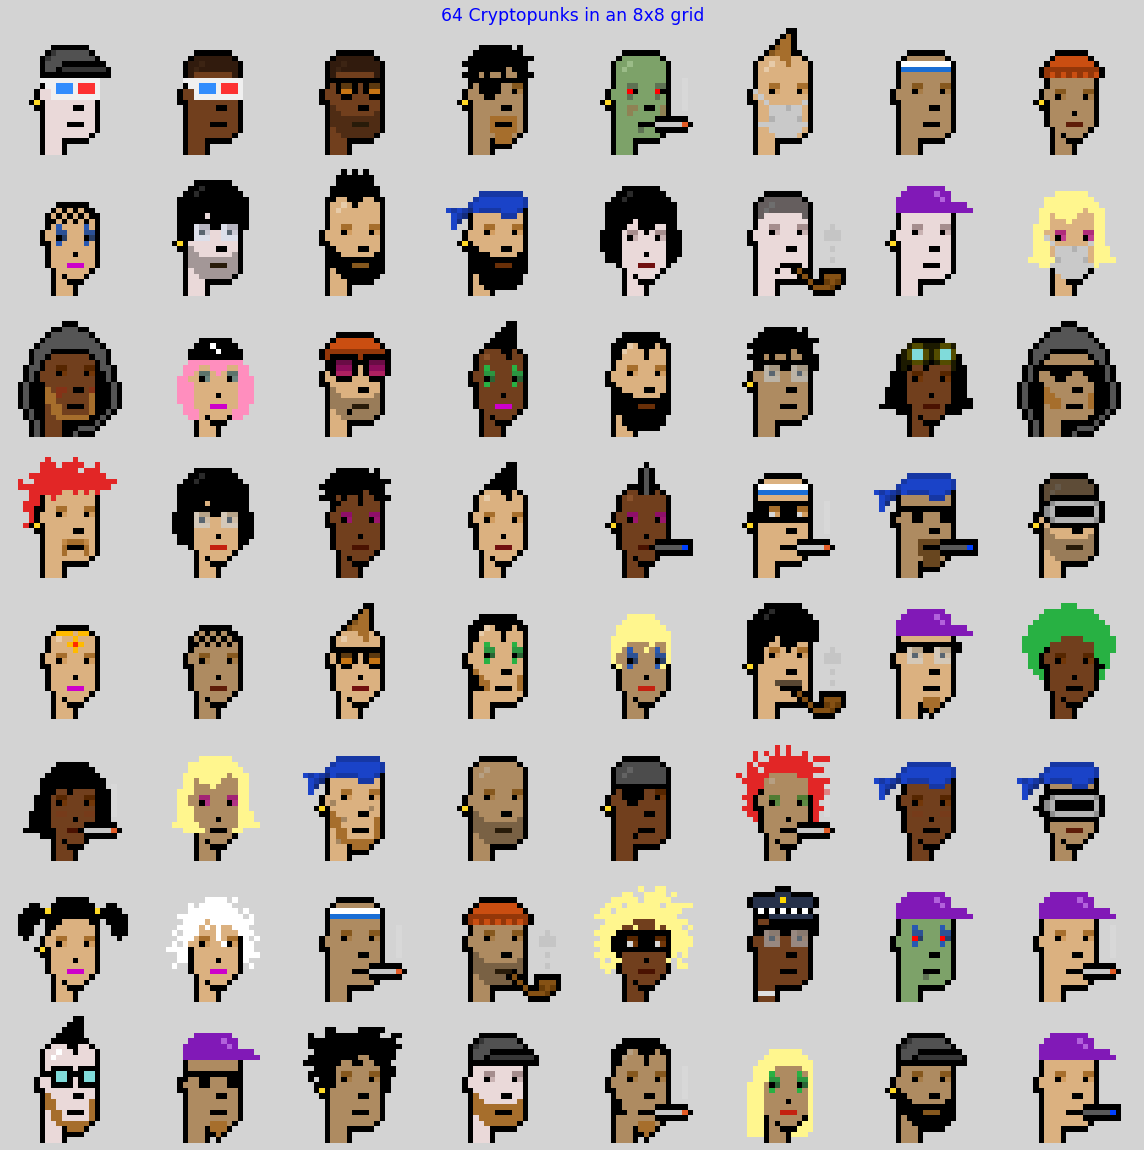

In [44]:
# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
faces = np.where(faces > 1, 1, faces)
plotimgs(faces, 8,filename="punks.png",title="64 Cryptopunks in an 8x8 grid")

Under er noe dere egentlig kan gjøre dere vil, men her viser vi hvordan dere kan splitte fargekanalene fra opasitetskanalen, samt reshape slik at dere har en array som dere kan anvende NMF på. 

In [45]:
# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

383

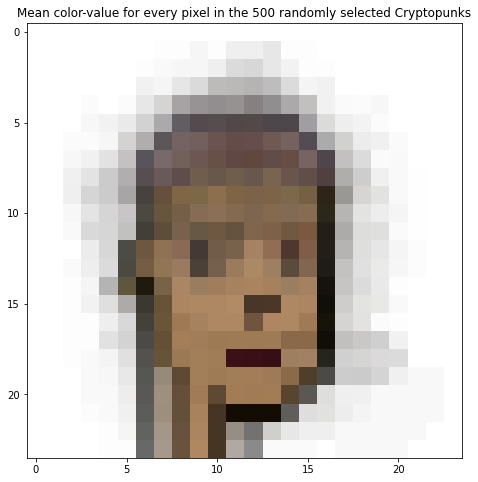

In [46]:
RGB_mean = np.mean(faces, axis=-1)
plt.rcParams["figure.figsize"] = (8,8)

plt.title("Mean color-value for every pixel in the 500 randomly selected Cryptopunks")
plt.imshow(RGB_mean)
np.linalg.matrix_rank(faces_reshaped)

The above plot shows us the CryptoPunk you get if you take the mean value of every pixel and color channel of all the 500 randomly selected CryptoPunks. This gives an insight in the common traits of all the CryptoPunks. The most prevelant traits are the placement of the mouth, eyes and the outline of the face. Moreover, this suggests that we can decompose each cryptopunk into a sum of traits. By using the NMF algorithm we aim to create a factorization that stores basis vectors in W, and linear combinations in H such that the original matrix A can be perfectly recreated. As mentioned in theory section 2.3 of the project description, there is no guarantee that having $d$ coloumns in W, and rows in H, gives a perfect reconstruction of a matrix $A$ with $rank(A) = d$. However, we expect the accuracy to increase as the number of rows and coloumns in W and H ,respectively, apporaches the rank of A. The rank of our matrix containing the faces is computed above to be $379$

In [39]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """
    if seed != 0:
        np.random.seed(seed)
    W = np.random.uniform(0,1,(V.shape[0],d))
    H = np.random.uniform(0,1,(d,V.shape[1]))
    W = np.sqrt(np.mean(V)/d)*W
    H = np.sqrt(np.mean(V)/d)*H
    V_dev = np.zeros(maxiter+1)
    for k in range(maxiter):
        V_dev[k] = np.linalg.norm(V-np.dot(W,H))
        H = H*np.dot(W.T,V)/(np.dot(W.T,np.dot(W,H))+delta) # Dot product is associative
        W = W*np.dot(V,H.T)/(np.dot(W,np.dot(H,H.T))+delta)
    V_dev[-1] = np.linalg.norm(V-np.dot(W,H))
    return W, H, V_dev

In [40]:
W, H, V_dev = NMF(faces_reshaped,64)

(1728, 64)


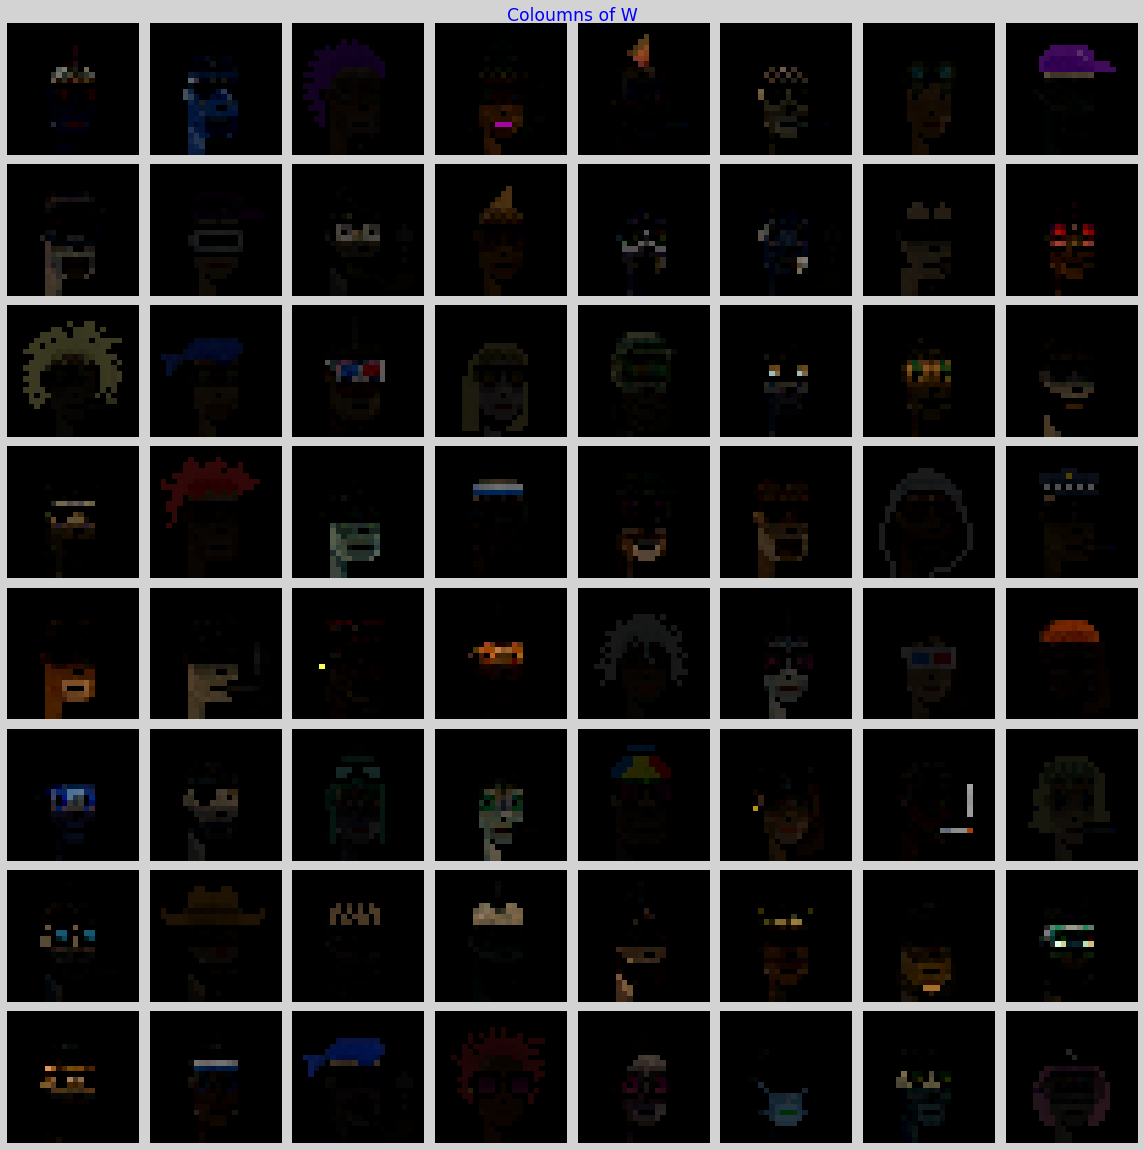

In [30]:
W_reshaped = np.where(W > 1,1,W).reshape((24,24,3,64))
print(W.shape)
plotimgs(W_reshaped,8, title = "Coloumns of W")

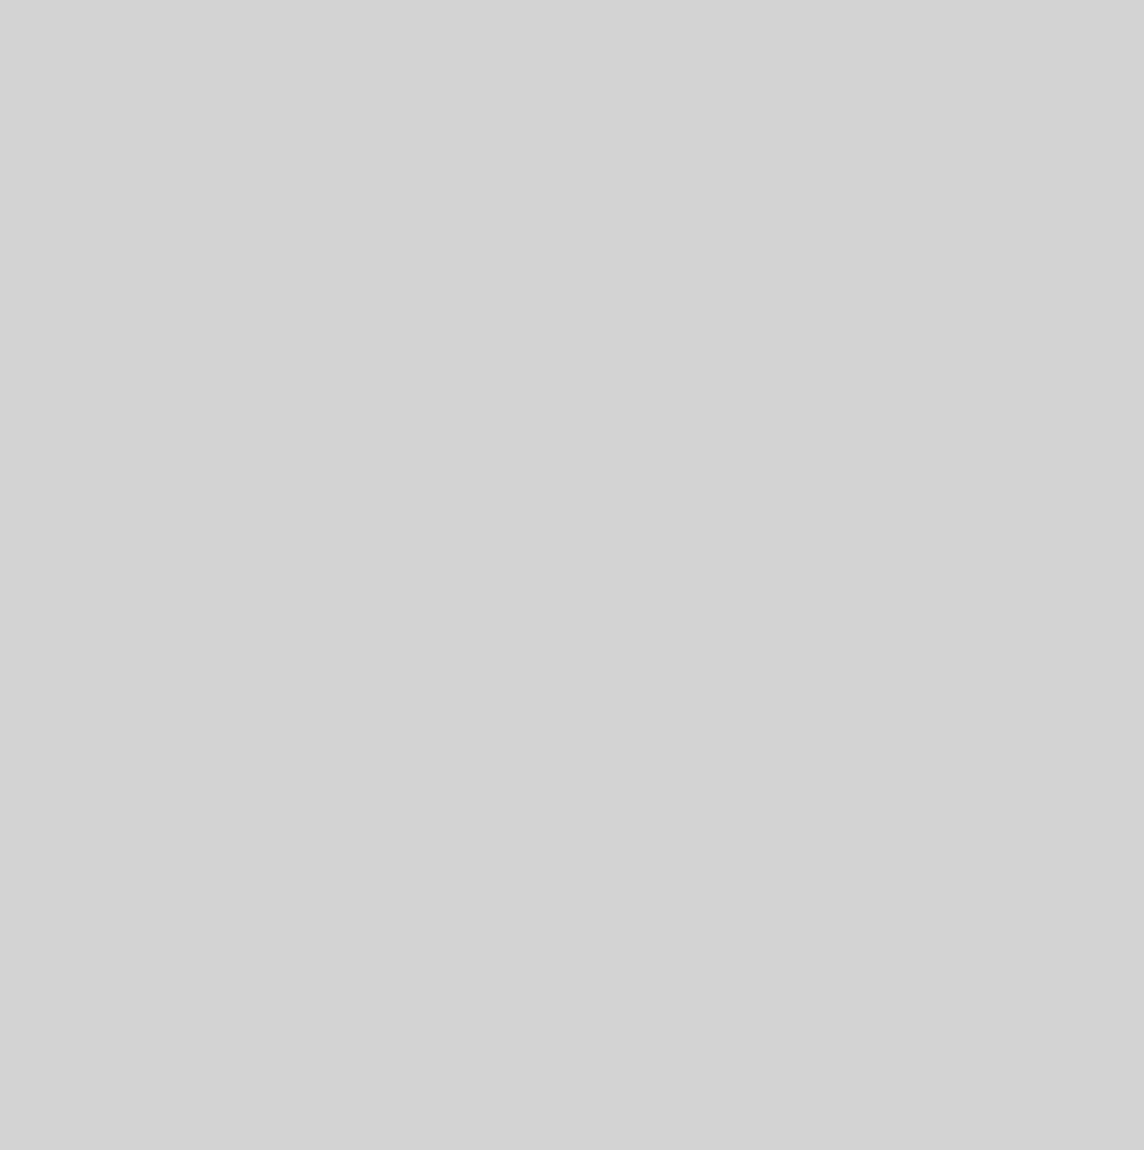

In [ ]:
A_reconst = np.dot(W,H)
# print(A_reconst.shape, faces_reshaped.shape)
A_reconst = np.where(A_reconst > 1,1,A_reconst).reshape((24,24,3,500))
# For plotting noisy images we add the opacity
faces_with_opacity = np.zeros(faces.shape)
faces_with_opacity[:,:,:3,:] = A_reconst.reshape(faces_rgb.shape)
faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(faces_with_opacity,8)

In [ ]:
W16,H16, V_dev16 = NMF(faces_reshaped,16)
W32,H32, V_dev32 = NMF(faces_reshaped,32)
W64,H64, V_dev64 = NMF(faces_reshaped,64)

KeyboardInterrupt: 

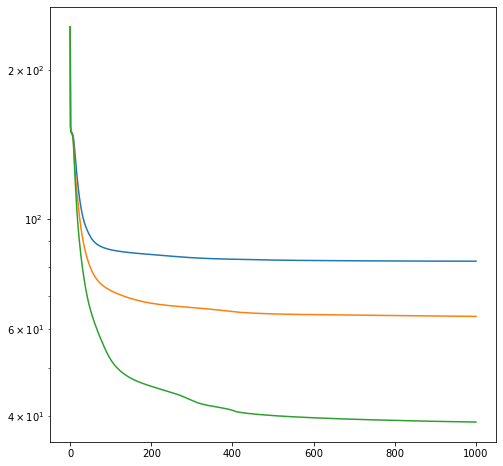

In [ ]:
x_vals = np.linspace(0,1000,1001)
plt.semilogy()
plt.plot(x_vals,V_dev16)
plt.plot(x_vals,V_dev32)
plt.plot(x_vals,V_dev64)
plt.show()

In [ ]:
W128,H128, V_dev128 = NMF(faces_reshaped,128)
W256,H256, V_dev256 = NMF(faces_reshaped,256)
W512,H512, V_dev512 = NMF(faces_reshaped,512)
W1024,H1024, V_dev1024 = NMF(faces_reshaped,1024)




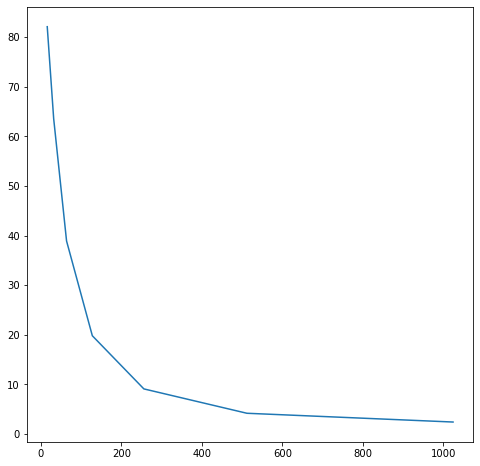

In [ ]:
list_of_d = np.array([16,32,64,128,256,512,1024])
list_of_norms = np.array([V_dev16[-1],V_dev32[-1],V_dev64[-1],V_dev128[-1],V_dev256[-1],V_dev512[-1],V_dev1024[-1]])
plt.plot(list_of_d, list_of_norms)

<h2>Oppgave 3</h2>

<h2> Legge til støy </h2>

Vi legger nå til støy i RGB kanalene slik det er forklart i oppgaveteksten

In [ ]:
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces



Vi kan nå legge til støy til bildene våre, legge på opasitetskanalaen igjen og plotte. Dere må gjøre noe lignende etter dere har anvendt NMF og ønsker å plotte rekonstruksjoner med opasitet.

42.343991624992576


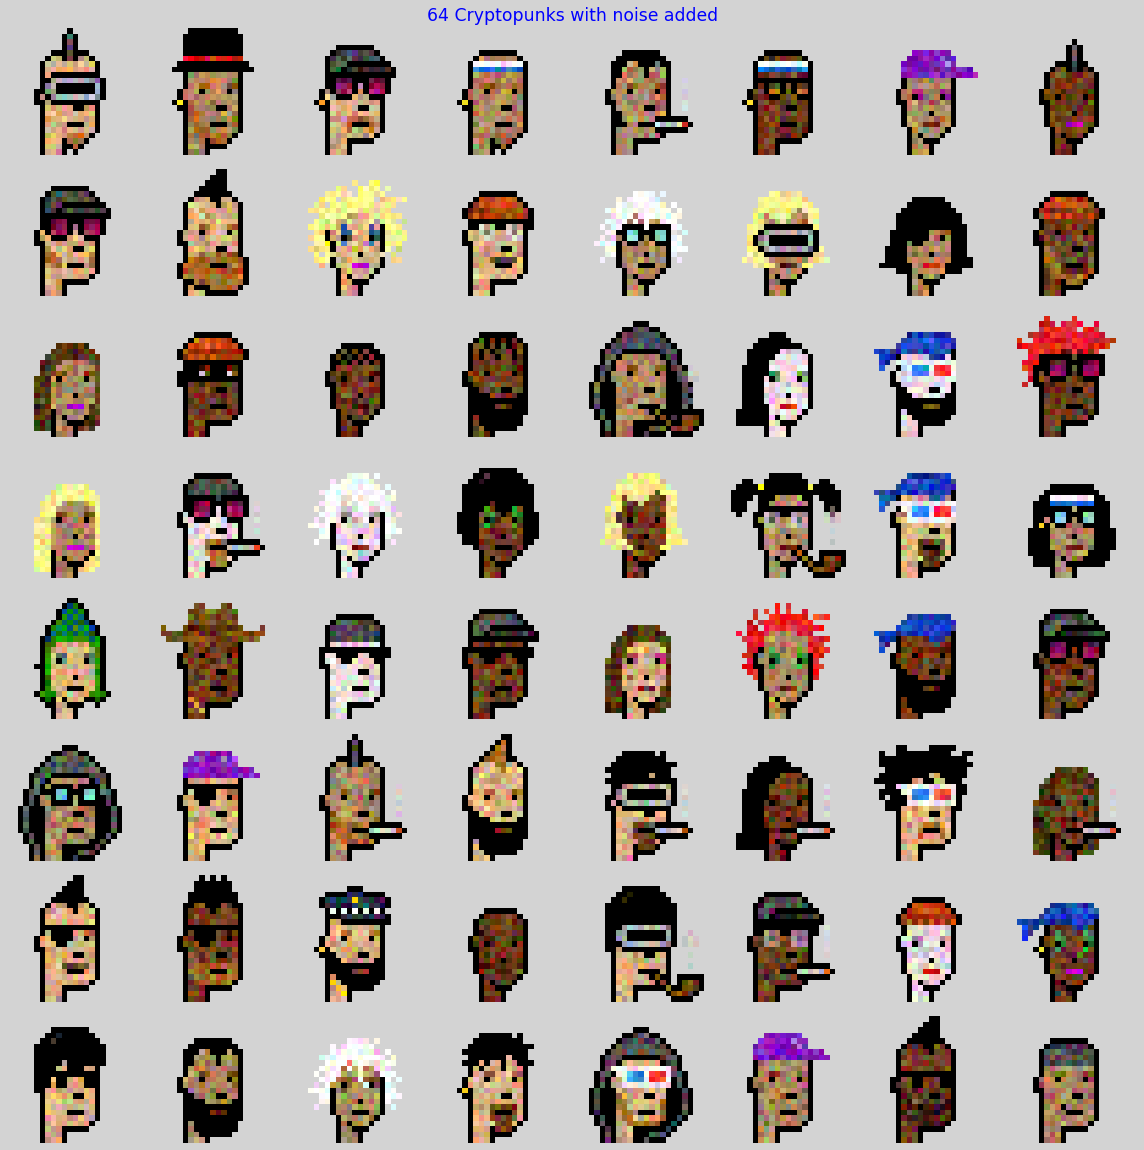

In [ ]:
noisy_faces = add_noise(faces_reshaped)

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped)
print(noise_residual)\

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(noisy_faces_with_opacity,8,title= "64 Cryptopunks with noise added")

In [ ]:
noisy_faces_reshaped = noisy_faces_with_opacity.reshape(np.prod(noisy_faces_with_opacity.shape)//N, N)
# noisy_faces_with_opacity.shape
W_noise, H_noise, V_dev_noise = NMF(noisy_faces,64)

In [ ]:
np.linalg.matrix_rank(noisy_faces)
test = W_noise

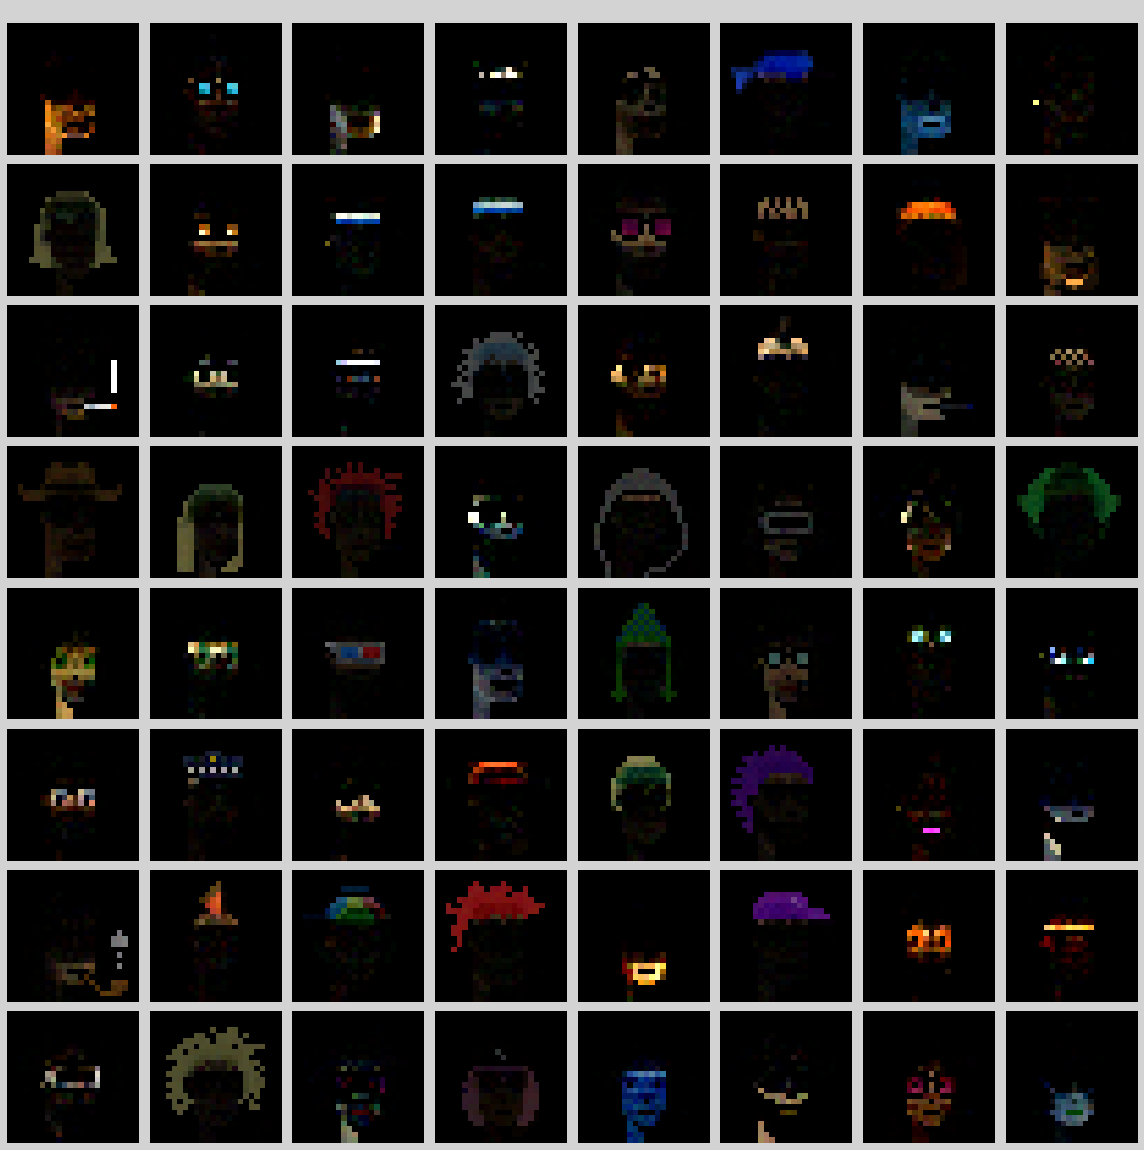

In [ ]:
W_noise_reshaped = np.where(W_noise > 1,1,W_noise).reshape(24,24,3,64)
plotimgs(W_noise_reshaped,8)
# noise_reconstructed = np.dot(W_noise,H_noise).reshape(24,24,4,128)

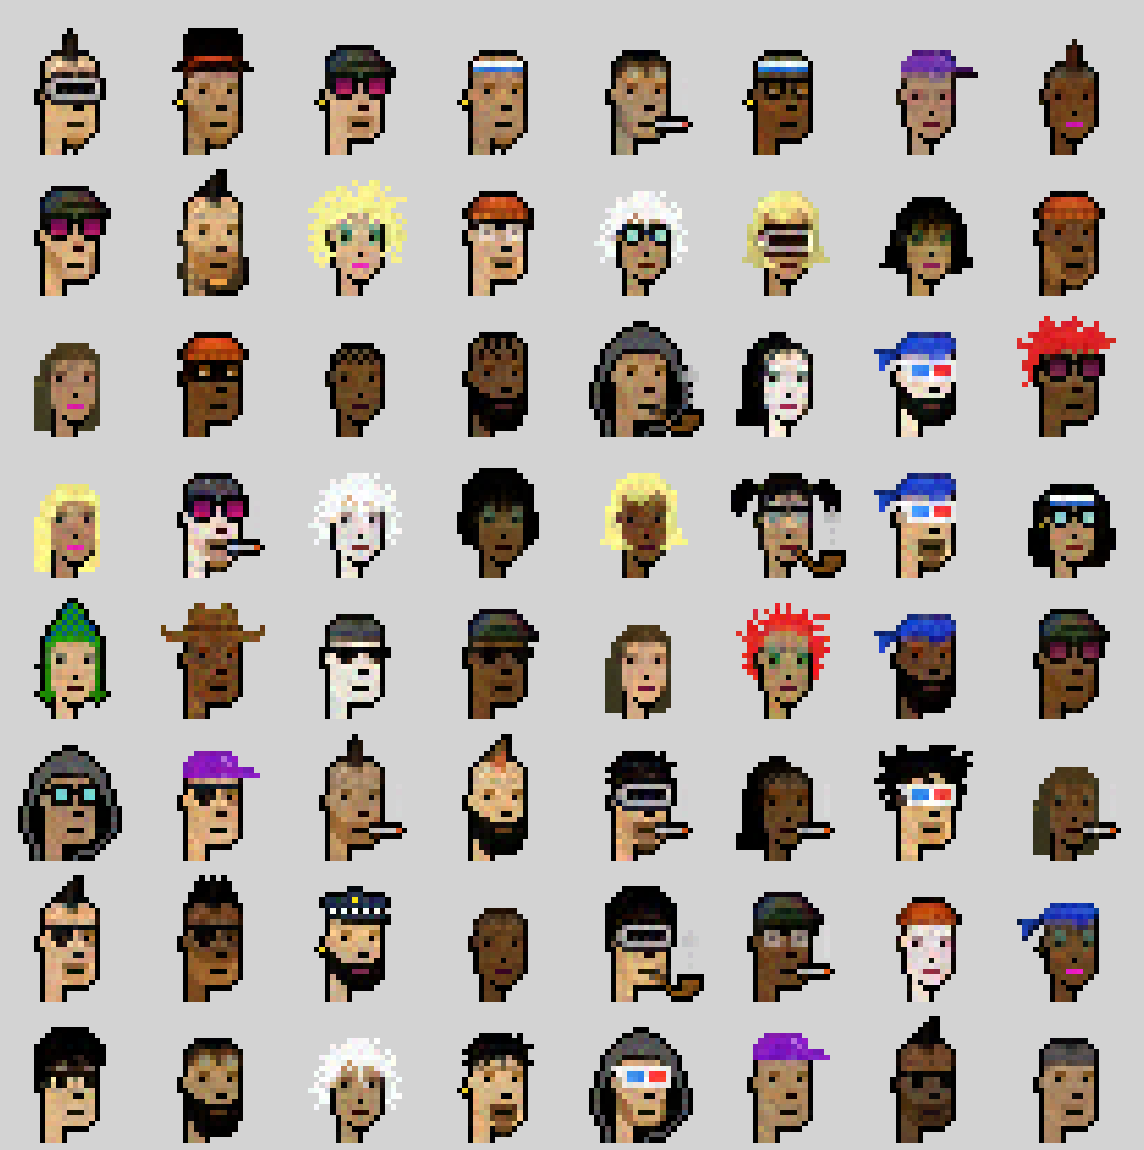

In [ ]:
noise_reconstructed = np.dot(test,H_noise)
noise_reconstructed = np.where(noise_reconstructed > 1, 1, noise_reconstructed).reshape(24,24,3,500)

# For plotting noisy images we add the opacity
recon_faces_with_opacity = np.zeros(faces.shape)
recon_faces_with_opacity[:,:,:3,:] = noise_reconstructed.reshape(faces_rgb.shape)
recon_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(recon_faces_with_opacity,8)
